<a href="https://colab.research.google.com/github/berthine/SIAM-Summer-School/blob/main/SIAM2021_Image_Classification_2_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practical: Image classification Prac 2
(20/July/2021)

### 2021 Gene Golub SIAM Summer School 
https://sites.google.com/aims.ac.za/g2s3/home 

Instructor

<font color="green">***Dr. Emmanuel Dufourq*** 

www.emmanueldufourq.com

edufourq (['@']) gmail.com

***African Institute for Mathematical Sciences***

***Stellenbosch University***

***2021***

***NOTE***

<font color="red">**Be sure to use hardware acceleration to use the GPU. Click on `Runtime`, change `runtime type`, and select `GPU` for the *hardware accelerator* option. Try to limit your time with the GPU. Terminate the session when possible due to limitations.**

## <font color="green"> Learning outcomes:

* Implement your own CNN 

* Adding a ```BatchNormalization``` operation

## <font color="green">Data information:

* Features: (32x32x3) images

* Output: 10 classes represented as integers

## <font color="green">Tasks for participants (boolean)?

* Yes, at the end (try avoid copy/pasting code, rather write it out)

## Imports first

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout,LeakyReLU, BatchNormalization
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

## Load the dataset

We will use the CIFAR10 dataset. Documentation https://www.tensorflow.org/datasets/catalog/cifar10

The CIFAR-10 dataset consists of 60000 32x32 **colour images** in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

In [2]:
# load data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

## Task: create a validation set

The data is obtained as a training and testing set. Typically, it's a good idea to create a validation set from the training set. Hint: previous pracs illustrated how to do this. Name the validation data as `X_val` and `Y_val`. Hint2: you might need to import a Python library to assist here. Check previous pracs.


In [3]:
# to do
X_train,X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=1)



## View the shape of all the datasets

print the shape of the training, validation and testing features/targets.

In [4]:
# to do
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(X_test.shape)

(40000, 32, 32, 3)
(40000, 1)
(10000, 32, 32, 3)
(10000, 1)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


## Find the unique numbers from the train labels

In [5]:
classes = np.unique(Y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


## Plot some of the data

Text(0.5, 1.0, 'Ground Truth : [3]')

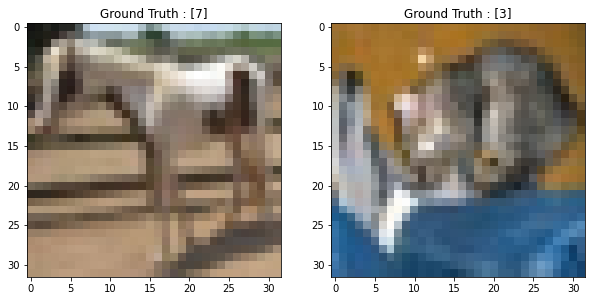

In [6]:
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[0]))

## Normalise

We need to normalise the data since the values range from 0 to 255. Training NNs on data ranging between [0,1] can be better. You will need to do this for the training, validation and testing features.

In [7]:
# to do
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

# Check the data after normalising

Are the values in each of the data splits between 0 and 1? You can print the minimum and maximum for each of the splits.

In [8]:
# to do
X_train[0]

array([[[0.07058824, 0.07058824, 0.06666667],
        [0.08627451, 0.09019608, 0.0745098 ],
        [0.14509804, 0.14901961, 0.12941176],
        ...,
        [0.75686275, 0.84313725, 0.89411765],
        [0.74117647, 0.82352941, 0.8745098 ],
        [0.74901961, 0.83529412, 0.88627451]],

       [[0.09019608, 0.09803922, 0.08235294],
        [0.10196078, 0.10588235, 0.08235294],
        [0.1254902 , 0.12156863, 0.09019608],
        ...,
        [0.47058824, 0.56470588, 0.50196078],
        [0.41568627, 0.50980392, 0.44705882],
        [0.47843137, 0.57254902, 0.50980392]],

       [[0.09411765, 0.11764706, 0.08627451],
        [0.09019608, 0.09019608, 0.05882353],
        [0.16470588, 0.14901961, 0.11372549],
        ...,
        [0.33333333, 0.41568627, 0.25490196],
        [0.33333333, 0.41568627, 0.25490196],
        [0.3372549 , 0.41960784, 0.25882353]],

       ...,

       [[0.70196078, 0.58431373, 0.46666667],
        [0.69019608, 0.56862745, 0.45490196],
        [0.70196078, 0

In [9]:
np.min(X_train[0])

0.058823529411764705

In [10]:
np.max(X_train[0])

1.0

In [11]:
X_train.shape

(40000, 32, 32, 3)

## One hot encoding

We're going to want our labels as one-hot vectors. Do this next.

In [12]:
# to do
Y_train = np_utils.to_categorical(Y_train, 10)
Y_val = np_utils.to_categorical(Y_val, 10)
Y_test = np_utils.to_categorical(Y_test, 10)
num_classes = 10

In [13]:
Y_train[0][1]

0.0

Print the shape of the targets after you have converted to one-hot encoded vectors. Does it look correct?

In [14]:
# to do
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(40000, 10)
(10000, 10)
(10000, 10)


## Create a CNN model

* Create any model you want.

* Try different activation functions, like ELU or LeakyReLU. to add LeakyReLU you will first have to import it, and then add it to your layer like this ```activation=LeakyRelu()``` which is different to relu where you could write ```activation='relu'```.

* Try any optimiser you want.

* Add as many layers, explore different things.

* Try to add batch normalisation ```model.add(BatchNormalization())```. Note that we made an import for this above. The API: https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization

* **try to get at least 68% accuracy on the test data**

In [15]:
from tensorflow.keras.layers import LeakyReLU

In [16]:
# to do
#from keras.layers import LeakyReLU

def baseline_model():
    # create model
    model = Sequential()
    
     
    model.add(Conv2D(filters=64, kernel_size=2, padding='same', input_shape=(32,32,3))) ##padding=same is to preserve the dimension
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPool2D(pool_size=2))

    model.add(Conv2D(filters=64, kernel_size=2, padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    # Here we create a 2x2 max pooling layer
    model.add(MaxPool2D(pool_size=2))
    model.add(Dropout(0.5))
    model.add(Conv2D(filters=32, kernel_size=2, padding='same')) ##padding=same is to preserve the dimension
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPool2D(pool_size=2))
    model.add(Conv2D(filters=32, kernel_size=2, padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
  
    model.add(Flatten())

    model.add(Dense(32))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='softmax'))

    #optimizer = SGD(learning_rate=0.9)
    optimizer = Adam(learning_rate=0.001)
    loss = CategoricalCrossentropy()
    
    # Compile the model
    model.compile(loss=loss,
             optimizer=optimizer,
             metrics=['accuracy'])
    return model

In [17]:
model = baseline_model()

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        832       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        16448     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

## Determine the number of trainable parameters

In [19]:
# to do

## Begin training

* Use the training and validation data

* Train for as many epochs as you want. Any batch size.

In [20]:
# to do
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val),epochs=50, batch_size = 256, verbose=1)

Epoch 1/50
157/157 [==============================] - 7s 23ms/step - loss: 2.0457 - accuracy: 0.2548 - val_loss: 2.4464 - val_accuracy: 0.1037
Epoch 2/50
157/157 [==============================] - 3s 21ms/step - loss: 1.6881 - accuracy: 0.3868 - val_loss: 2.4612 - val_accuracy: 0.1741
Epoch 3/50
157/157 [==============================] - 3s 21ms/step - loss: 1.5425 - accuracy: 0.4410 - val_loss: 2.1372 - val_accuracy: 0.2765
Epoch 4/50
157/157 [==============================] - 3s 21ms/step - loss: 1.4673 - accuracy: 0.4683 - val_loss: 1.6930 - val_accuracy: 0.4065
Epoch 5/50
157/157 [==============================] - 3s 21ms/step - loss: 1.4045 - accuracy: 0.4967 - val_loss: 1.2881 - val_accuracy: 0.5407
Epoch 6/50
157/157 [==============================] - 3s 21ms/step - loss: 1.3491 - accuracy: 0.5153 - val_loss: 1.4682 - val_accuracy: 0.4737
Epoch 7/50
157/157 [==============================] - 3s 21ms/step - loss: 1.3078 - accuracy: 0.5358 - val_loss: 1.1484 - val_accuracy: 0.5892

## Predict on the test data

In [21]:
# to do
correct_values = np.argmax(Y_test,axis=1)
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=-1)

## Compute the test accuracy

What did you get? Try get over 68% testing accuracy.

After 20 epochs of training and a model with roughly 50,000 parameters I got 70.8% on the testing data.

In [22]:
# to do
accuracy_score(predictions, np.argmax(Y_test, axis = -1))*100

70.23

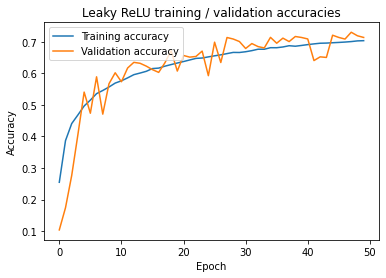

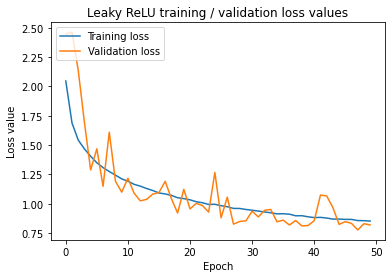

In [23]:
# Visualize model history
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Leaky ReLU training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Leaky ReLU training / validation loss values')
plt.ylabel('Loss value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()